## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [31]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [32]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [33]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/Vishwa/Desktop/DR/dataset/train'
valid_path = 'C:/Users/Vishwa/Desktop/DR/dataset/test'


In [34]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [35]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [36]:
  # useful for getting number of output classes
folders = glob('C:/Users/Vishwa/Desktop/DR/dataset/train/*')

In [37]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [38]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [39]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [40]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [41]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Vishwa/Desktop/DR/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 330 images belonging to 5 classes.


In [43]:
test_set = test_datagen.flow_from_directory('C:/Users/Vishwa/Desktop/DR/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 330 images belonging to 5 classes.


In [45]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-45-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
11/11 [==============================] - 80s 7s/step - loss: 0.8486 - accuracy: 0.8061 - val_loss: 0.4242 - val_accuracy: 0.8758
Epoch 2/50
11/11 [==============================] - 104s 10s/step - loss: 1.0544 - accuracy: 0.7576 - val_loss: 0.9334 - val_accuracy: 0.7879
Epoch 3/50
11/11 [==============================] - 77s 7s/step - loss: 1.0065 - accuracy: 0.7970 - val_loss: 0.4688 - val_accuracy: 0.8939
Epoch 4/50
11/11 [==============================] - 79s 7s/step - loss: 0.7594 - accuracy: 0.8364 - val_loss: 0.5670 - val_accuracy: 0.8636
Epoch 5/50
11/11 [==============================] - 80s 7s/step - loss: 0.5926 - accuracy: 0.8455 - val_loss: 0.9443 - val_accuracy: 0.7697
Epoch 6/50
11/11 [==============================] - 80s 8s/step - loss: 0.5314 - accuracy: 0.8485 - val_loss: 0.3934 - val_accuracy: 0.8788
Epoch 7/50
11/11 [==============================] - 79s 7s/step - loss: 0.6290 - accuracy: 0.8606 - val_loss: 0.7651 - val_accuracy: 0.8303
Epoch 8/50
11/11 [

In [46]:
import matplotlib.pyplot as plt

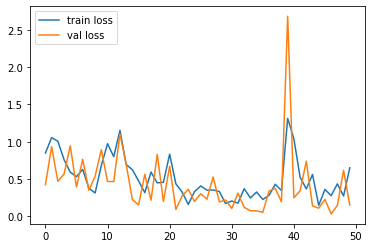

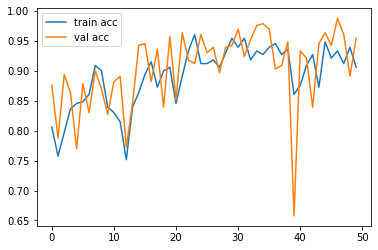

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model.h5')